In [1]:
%autosave 10

Autosaving every 10 seconds


In [6]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [7]:
df = pd.read_csv('cleaned_data.csv')

In [8]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.3, random_state=3)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
model_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [23]:
y_pred_proba = model_lr.predict_proba(X_test)
pos_proba = y_pred_proba[:,1]
y_pred_proba

array([[0.98579562, 0.01420438],
       [0.56796222, 0.43203778],
       [0.53413953, 0.46586047],
       ...,
       [0.51708971, 0.48291029],
       [0.53413953, 0.46586047],
       [0.79700981, 0.20299019]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


##### Plotting ROC AUC Curve of LIMIT_BAL

In [46]:
from sklearn import metrics

In [47]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

In [63]:
y_test_pred_proba = model_lr.predict_proba(X_test)
metrics.roc_auc_score(y_test, y_test_pred_proba[:,1])

0.5

Text(0.5, 1.0, 'ROC curve using LIMIT_BAL')

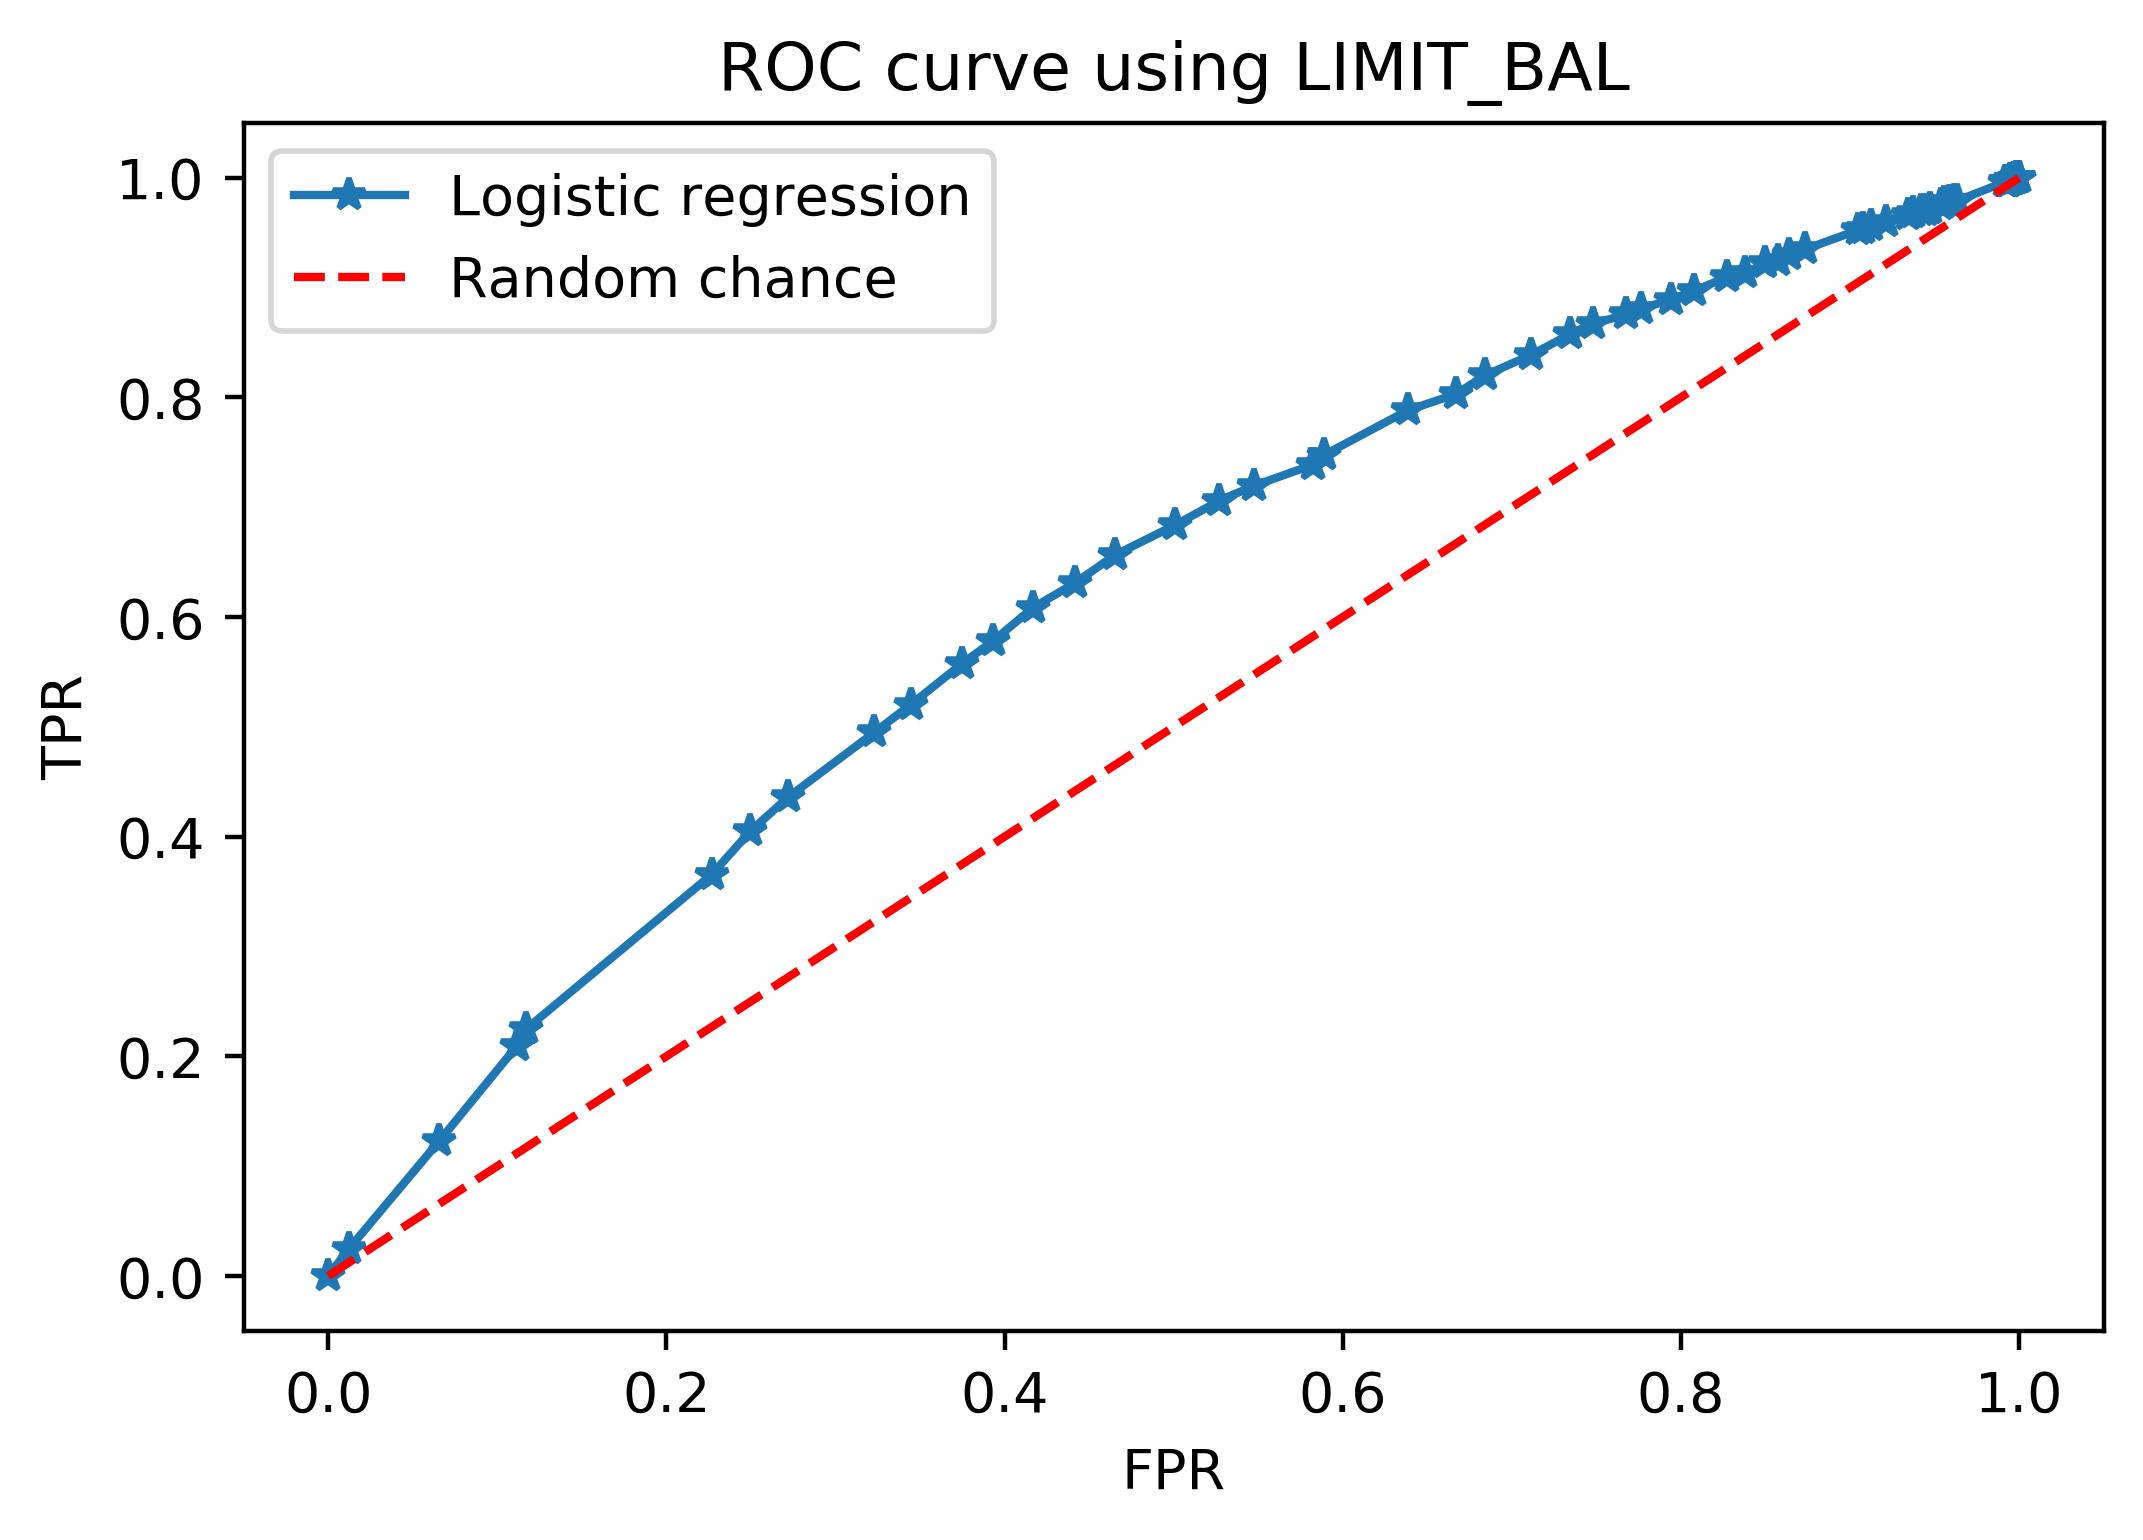

In [48]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve using LIMIT_BAL')

##### Plotting ROC AUC Curve of EDUCATION

In [49]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=3)

In [50]:
model_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_test_2_pred_proba = model_lr.predict_proba(X_test_2)

_________________________________________________________________________
**Now, plot the ROC curve.**


In [52]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:,1])

Text(0.5, 1.0, 'ROC curve using EDUCATION')

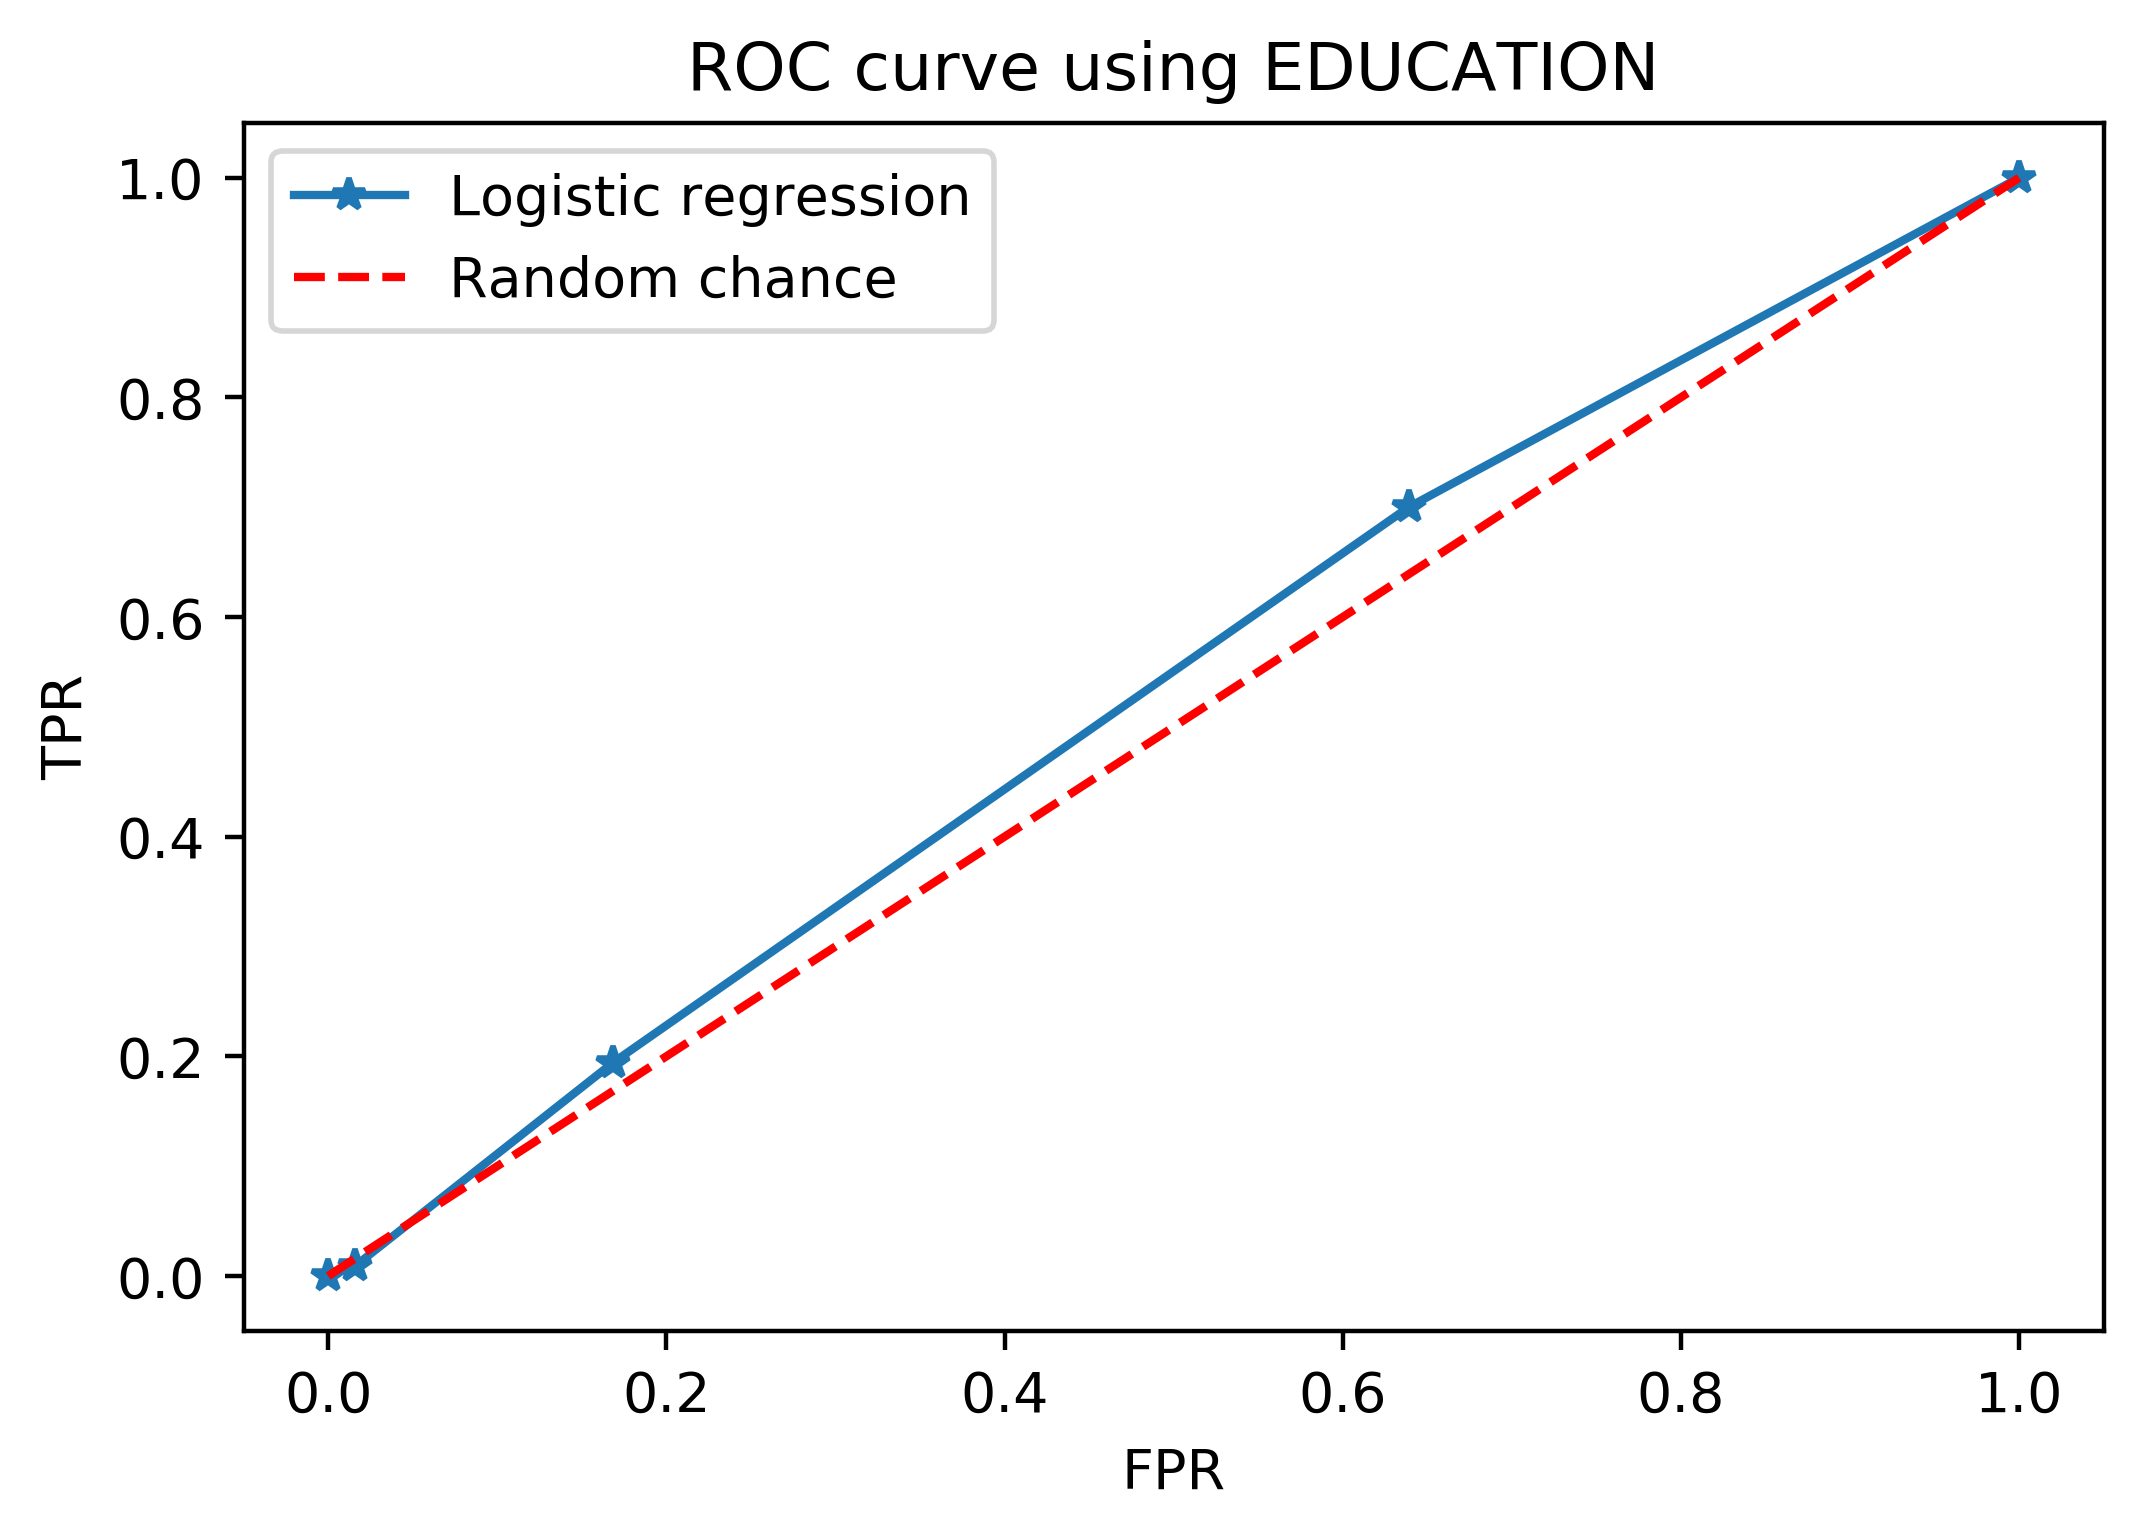

In [53]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve using EDUCATION')

### From the above two curves it is clear that LIMIT_BAL is a better feature for estimation owing to the high TPR values

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [55]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(y_test, y_pred_proba[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


(0, 1)

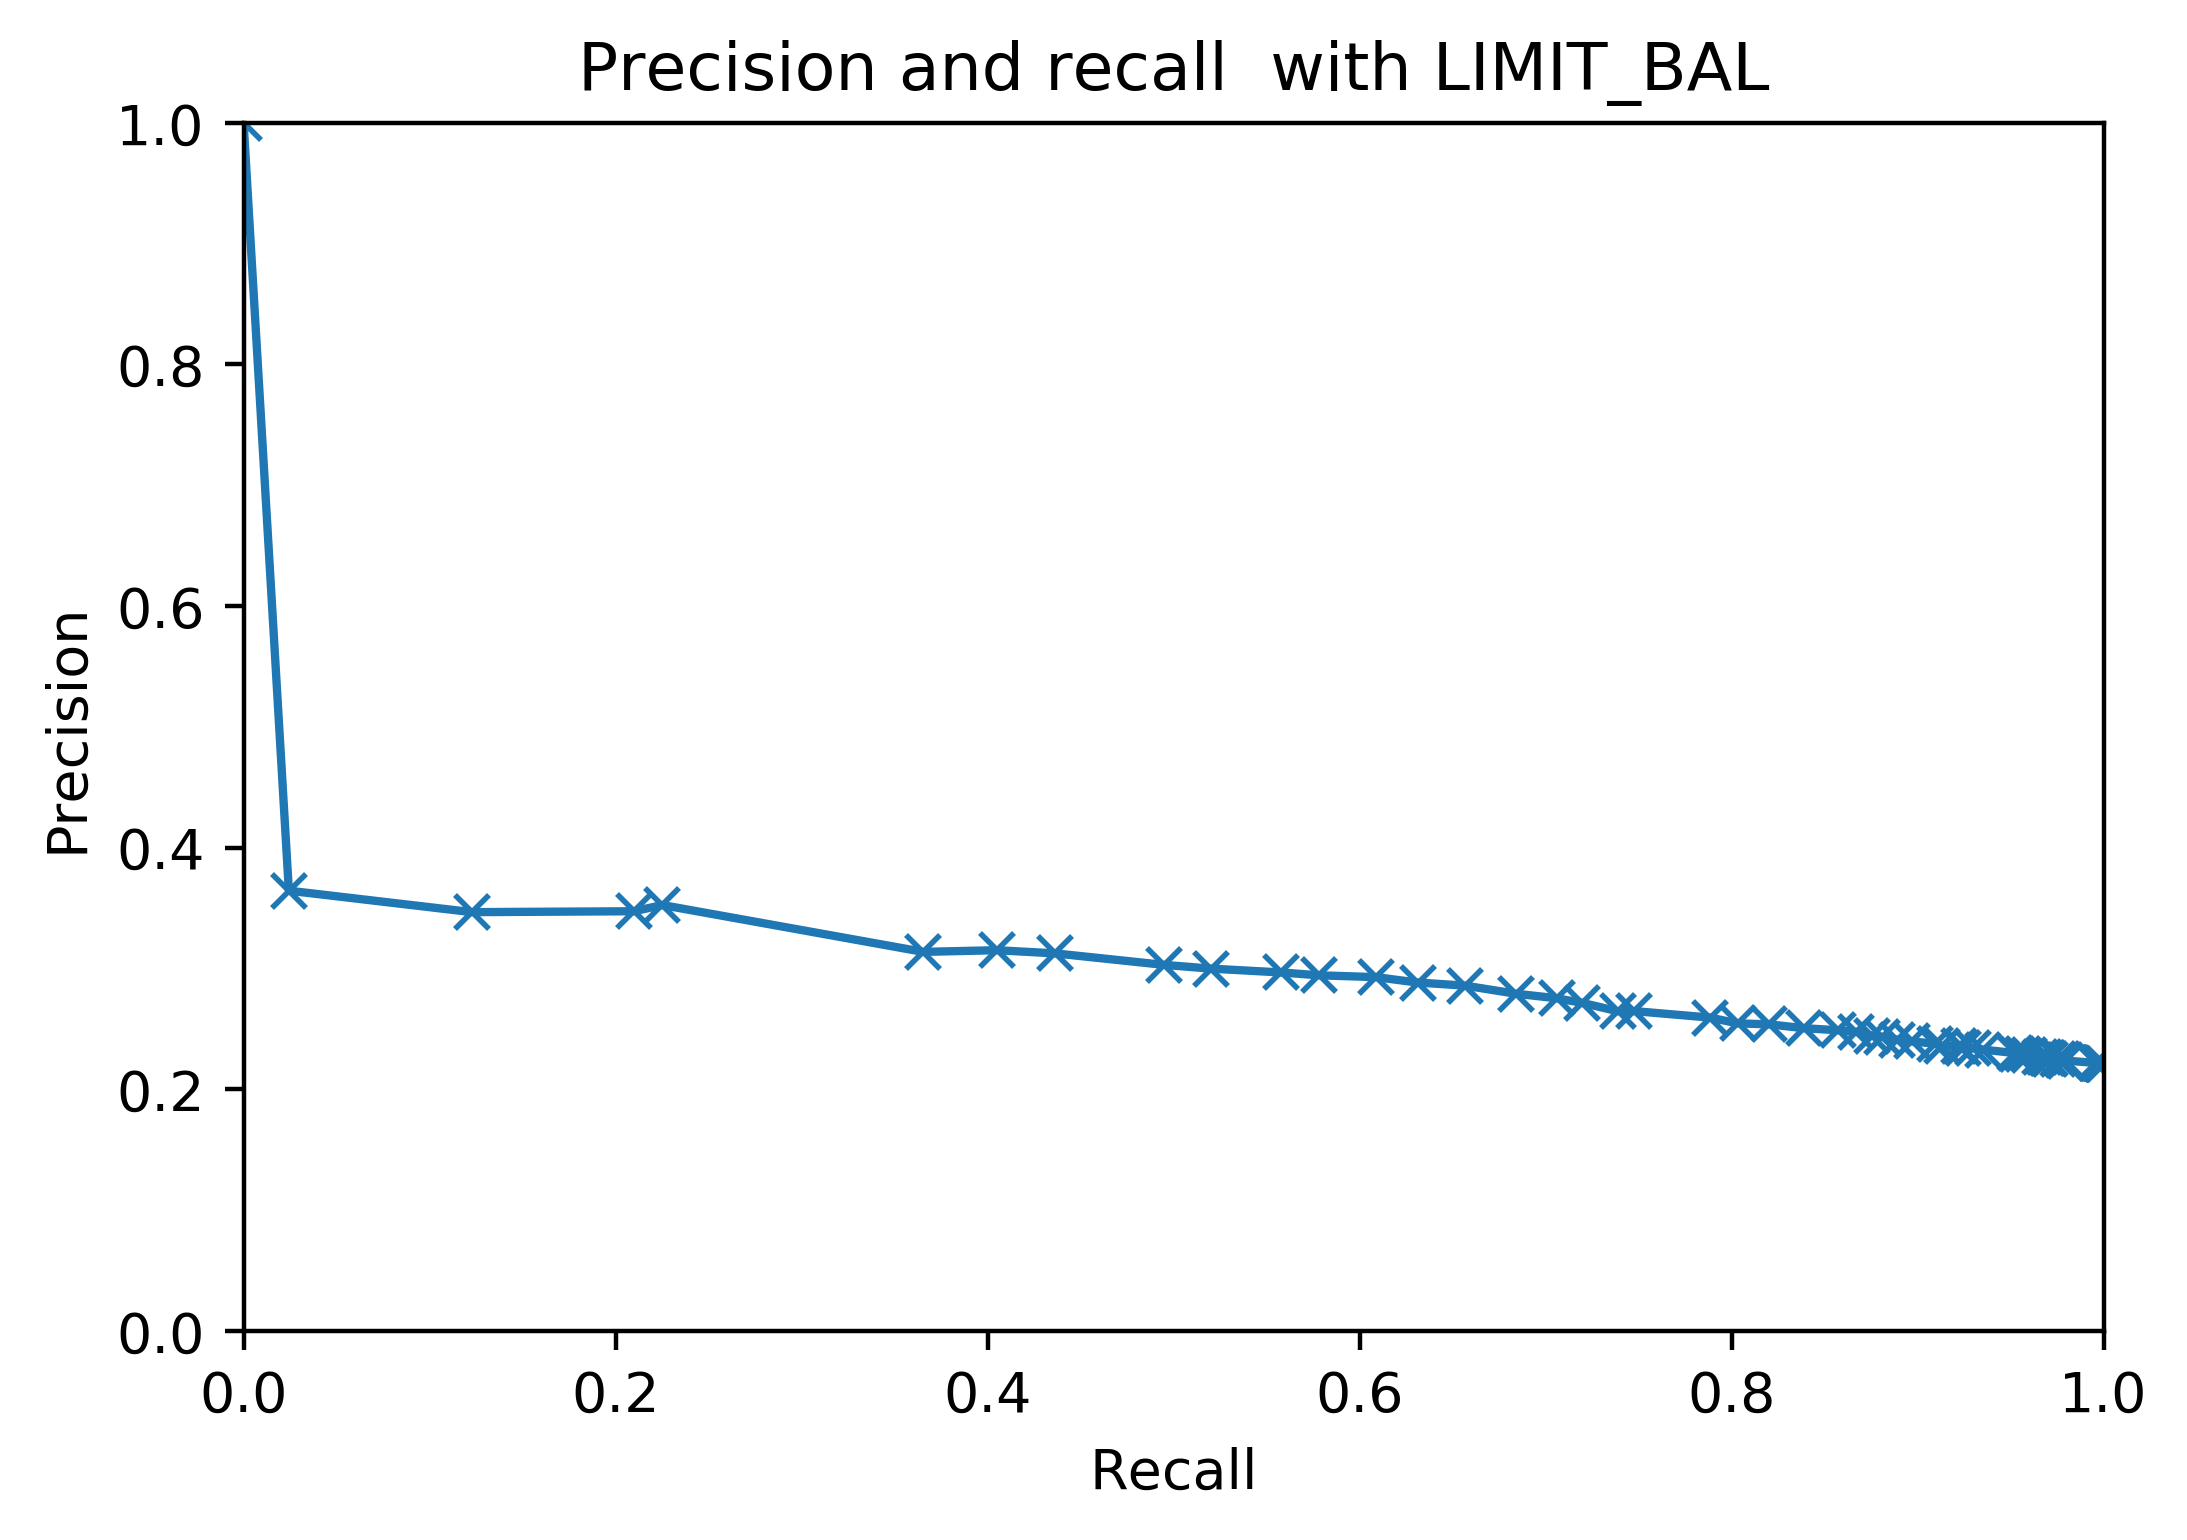

In [57]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall  with LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [59]:
metrics.auc(recall, precision)

0.30842507976510314

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [61]:
y_train_pred_proba = model_lr.predict_proba(X_train)
metrics.roc_auc_score(y_train, y_train_pred_proba[:,1])

0.5

    How is this different, conceptually and quantitatively, from your earlier calculation?


### It Turns out to be exactly same to the testing data!!